In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.image import imread

sns.set()

In [5]:
plt.rcParams['figure.figsize'] = [16, 6]
plt.rcParams.update({'font.size': 18})


# Define randomized SVD function
def rSVD(X, r, q, p):
    # Step 1: Sample column space of X with P matrix
    ny = X.shape[1]
    P = np.random.randn(ny, r + p)
    Z = X @ P
    for k in range(q):
        Z = X @ (X.T @ Z)

    Q, R = np.linalg.qr(Z, mode='reduced')

    # Step 2: Compute SVD on projected Y = Q.T @ X
    Y = Q.T @ X
    UY, S, VT = np.linalg.svd(Y, full_matrices=0)
    U = Q @ UY

    return U, S, VT

In [7]:
A = imread("../datasets/jupiter.jpg")
X = np.mean(A, axis=2)  # Convert RGB -> grayscale

U, S, VT = np.linalg.svd(X, full_matrices=0)  # Deterministic SVD

r = 400  # Target rank
q = 1  # Power iterations
p = 5  # Oversampling parameter

rU, rS, rVT = rSVD(X, r, q, p)

In [8]:
## Reconstruction
XSVD = U[:, :(r + 1)] @ np.diag(S[:(r + 1)]) @ VT[:(r + 1), :]  # SVD approximation
errSVD = np.linalg.norm(X - XSVD, ord=2) / np.linalg.norm(X, ord=2)

XrSVD = rU[:, :(r + 1)] @ np.diag(rS[:(r + 1)]) @ rVT[:(r + 1), :]  # SVD approximation
errSVD = np.linalg.norm(X - XrSVD, ord=2) / np.linalg.norm(X, ord=2)

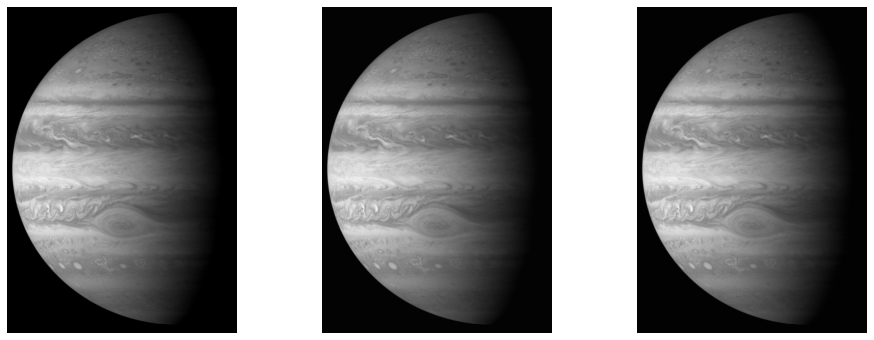

In [9]:
fig, axs = plt.subplots(1, 3)

plt.set_cmap('gray')
axs[0].imshow(X)
axs[0].axis('off')
axs[1].imshow(XSVD)
axs[1].axis('off')
axs[2].imshow(XrSVD)
axs[2].axis('off')

plt.show()